In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics 
import sys
import os
import time
import concurrent.futures
from functools import partial

os.chdir('..')

from models.model3 import model as model3
from models.model4 import model as model4
from models.model5 import model as model5

from model_utils.evaluator import gen_eval, print_eval

nc_src = './well_data/src_data.csv'
k_fold = 1

In [2]:
start = time.time()

with concurrent.futures.ThreadPoolExecutor() as executor:
    # Use partial to set the constant arguments k_fold and the stain.
    m3_red_func   = partial(model3.main, f'./well_data/k{k_fold}.csv', k_fold, stain='Red')
    m3_black_func = partial(model3.main, f'./well_data/k{k_fold}.csv', k_fold, stain='Black')
    m4_red_func   = partial(model4.main, f'./well_data/k{k_fold}.csv', k_fold, stain='Red')
    m4_black_func = partial(model4.main, f'./well_data/k{k_fold}.csv', k_fold, stain='Black')
    m5_red_func   = partial(model5.main, f'./well_data/k{k_fold}.csv', k_fold, stain='Red')
    m5_black_func = partial(model5.main, f'./well_data/k{k_fold}.csv', k_fold, stain='Black')
    
    # Submit the functions to the executor.
    m3_red   = executor.submit(m3_red_func)
    m3_black = executor.submit(m3_black_func)
    m4_red   = executor.submit(m4_red_func)
    m4_black = executor.submit(m4_black_func)
    m5_red   = executor.submit(m5_red_func)
    m5_black = executor.submit(m5_black_func)
    
    # Get the results of the functions (these will block until the functions complete).
    m3_red   = m3_red.result()
    m3_black = m3_black.result()
    m4_red   = m4_red.result()
    m4_black = m4_black.result()
    m5_red   = m5_red.result()
    m5_black = m5_black.result()

end = time.time()
print(f'time taken: {end - start} seconds')

time taken: 4120.3166716098785 seconds


In [3]:
print('--------m3_red--------')
m3_red_eval = gen_eval(m3_red)
print_eval(m3_red_eval)

print('--------m3_black--------')
m3_black_eval = gen_eval(m3_black)
print_eval(m3_black_eval)

print('--------m4_red--------')
m4_red_eval = gen_eval(m4_red)
print_eval(m4_red_eval)

print('--------m4_black--------')
m4_black_eval = gen_eval(m4_black)
print_eval(m4_black_eval)

print('--------m5_red--------')
m5_red_eval = gen_eval(m5_red)
print_eval(m5_red_eval)

print('--------m5_black--------')
m5_black_eval = gen_eval(m5_black)
print_eval(m5_black_eval)

--------m3_red--------
accuracy: 0.8064995165078049
precision: 0.8295930514527579
specificity: 0.8782868839552826

sensitivity: 0.7193485491455442
f1_score: 0.7705475244686515
--------m3_black--------


/home/kane/code/fyp/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.5483319519270617
precision: 0.0
specificity: 1.0

sensitivity: 0.0
f1_score: 0.0
--------m4_red--------
accuracy: 0.8152369111755767
precision: 0.8313113559394693
specificity: 0.8760825066918595

sensitivity: 0.7413694230989792
f1_score: 0.7837684908253173
--------m4_black--------


/home/kane/code/fyp/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.5483319519270617
precision: 0.0
specificity: 1.0

sensitivity: 0.0
f1_score: 0.0
--------m5_red--------
accuracy: 0.8359292259520191
precision: 0.8219043937636903
specificity: 0.8549099879284102

sensitivity: 0.8128862892023805
f1_score: 0.8173704678980787
--------m5_black--------
accuracy: 0.598396417553069
precision: 0.9489985546149081
specificity: 0.9948144649136619

sensitivity: 0.11713881561341133
f1_score: 0.20853704186848465


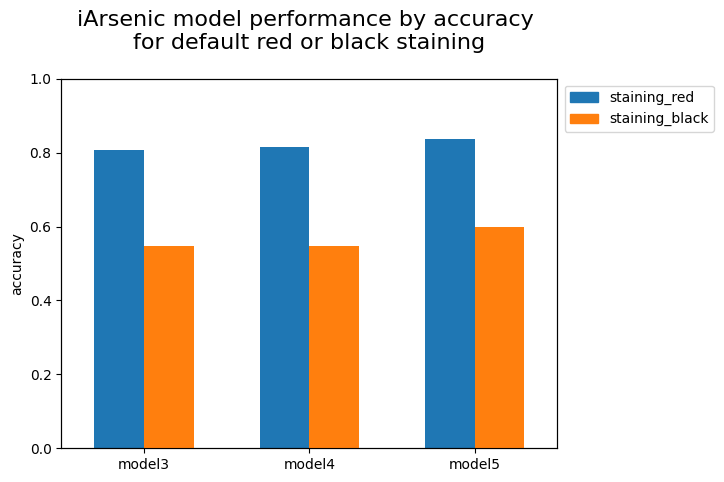

In [9]:
def dual_bar_model_color_stain():
    model_evals_red = [
        m3_red_eval,
        m4_red_eval,
        m5_red_eval,
    ]
    
    model_evals_black = [
        m3_black_eval,
        m4_black_eval,
        m5_black_eval,
    ]

    df_red = pd.DataFrame.from_records(model_evals_red, index=range(0, len(model_evals_red)))
    df_black = pd.DataFrame.from_records(model_evals_black, index=range(0, len(model_evals_black)))
    
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot() # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    
    ax.set_ylim(0, 1)
    ax2.set_ylim(0, 1)

    
    width = 0.3
    
    ax_color = 'tab:blue'
    ax2_color = 'tab:orange'

    df_red['accuracy'].plot(kind='bar', color=ax_color, ax=ax, width=width, position=1, rot=0)
    df_black['accuracy'].plot(kind='bar', color=ax2_color, ax=ax2, width=width, position=0, rot=0)
    
    ax.set_xlim(-0.5, 2.5)
    ax2.set_xlim(-0.5, 2.5)
    ax2.get_yaxis().set_visible(False)

    ax.set_ylabel('accuracy')
    plt.xticks([0, 1, 2], ['model3', 'model4', 'model5'])
    
    colors = {'staining_red': ax_color, 'staining_black': ax2_color}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.33, 1))
    
    plt.text(
        0.5, 
        1.08,
        'iArsenic model performance by accuracy \nfor default red or black staining',
        horizontalalignment='center',
        fontsize=16,
        transform = ax.transAxes
    )

    plt.show()
    
    return
    
dual_bar_model_color_stain()

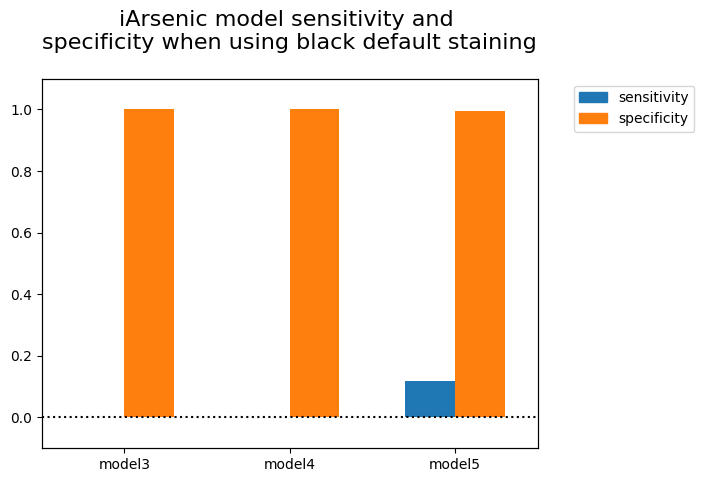

In [10]:
def dual_bar_model_sensitivity_specificity_black():
    model_evals_black = [
        m3_black_eval,
        m4_black_eval,
        m5_black_eval,
    ]

    df_black = pd.DataFrame.from_records(model_evals_black, index=range(0, len(model_evals_black)))
    
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot() # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    
    ax.set_ylim(-0.1, 1.1)
    ax2.set_ylim(-0.1, 1.1)

    width = 0.3
    
    ax_color = 'tab:blue'
    ax2_color = 'tab:orange'

    df_black['sensitivity'].plot(kind='bar', color=ax_color, ax=ax, width=width, position=1, rot=0)
    df_black['specificity'].plot(kind='bar', color=ax2_color, ax=ax2, width=width, position=0, rot=0)
    
    ax.set_xlim(-0.5, 2.5)
    ax2.set_xlim(-0.5, 2.5)
    ax2.get_yaxis().set_visible(False)

    plt.xticks([0, 1, 2], ['model3', 'model4', 'model5'])
    
    colors = {'sensitivity': ax_color, 'specificity': ax2_color}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.33, 1))
    
    plt.text(
        0.5, 
        1.08,
        'iArsenic model sensitivity and \nspecificity when using black default staining',
        horizontalalignment='center',
        fontsize=16,
        transform = ax.transAxes
    )
    
    plt.axhline(y=0, color='k', linestyle='dotted')

    plt.show()
    
    return
    
dual_bar_model_sensitivity_specificity_black()

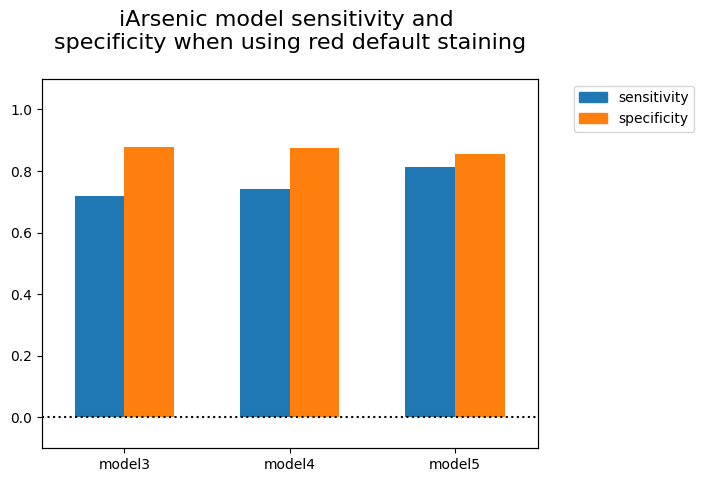

In [11]:
def dual_bar_model_sensitivity_specificity_red():
    model_evals_red = [
        m3_red_eval,
        m4_red_eval,
        m5_red_eval,
    ]

    df_red = pd.DataFrame.from_records(model_evals_red, index=range(0, len(model_evals_red)))
    
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot() # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    
    ax.set_ylim(-0.1, 1.1)
    ax2.set_ylim(-0.1, 1.1)

    width = 0.3
    
    ax_color = 'tab:blue'
    ax2_color = 'tab:orange'
    
    df_red['sensitivity'].plot(kind='bar', color=ax_color, ax=ax, width=width, position=1, rot=0)
    df_red['specificity'].plot(kind='bar', color=ax2_color, ax=ax2, width=width, position=0, rot=0)
    
    ax.set_xlim(-0.5, 2.5)
    ax2.set_xlim(-0.5, 2.5)
    ax2.get_yaxis().set_visible(False)

    plt.xticks([0, 1, 2], ['model3', 'model4', 'model5'])
    
    colors = {'sensitivity': ax_color, 'specificity': ax2_color}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.33, 1))
    
    plt.text(
        0.5, 
        1.08,
        'iArsenic model sensitivity and \nspecificity when using red default staining',
        horizontalalignment='center',
        fontsize=16,
        transform = ax.transAxes
    )
    
    plt.axhline(y=0, color='k', linestyle='dotted')
    plt.show()
    
    return
    
dual_bar_model_sensitivity_specificity_red()

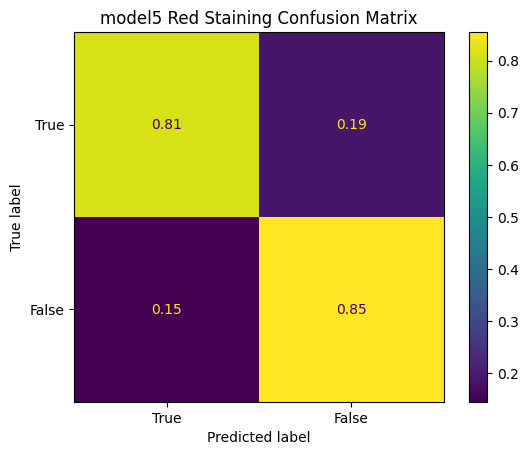

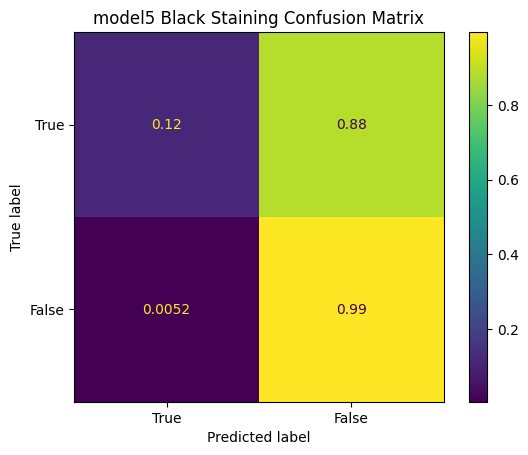

In [24]:
def red_vs_black_confusion_matrices():
    confusion_matrix = metrics.confusion_matrix(
        m5_red['Label'],
        m5_red['Prediction'],
        normalize='true',
    )
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix, 
        display_labels = [True, False]
    )
    cm_display.plot()
    plt.title('model5 Red Staining Confusion Matrix')
    plt.show() 
    
    confusion_matrix = metrics.confusion_matrix(
        m5_black['Label'],
        m5_black['Prediction'],
        normalize='true',
    )
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix, 
        display_labels = [True, False]
    )
    cm_display.plot()
    plt.title('model5 Black Staining Confusion Matrix')
    plt.show() 
    
red_vs_black_confusion_matrices()